In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from os import path
import itertools
import requests
from io import StringIO
from pandas import DataFrame
import requests
from time import sleep
from matplotlib.font_manager import FontProperties

In [2]:
fontP = FontProperties()
fontP.set_size('small')

In [3]:
%matplotlib inline

In [10]:
def get_word(word):
  found = False
  while not found:
    req = requests.get(params={"response_type": "json", "keyword": word},
                       url="http://chronicle.nytlabs.com/graph")
    if req.status_code == requests.codes.ok:
      df = pd.DataFrame.from_records(req.json())
      term = word.strip().replace(" ", "_")
      df = df.rename(columns={"total_articles_published": "Total", "article_matches": term})
      database = df[["Total", term, "year"]]
      return database
    else:
      print("We could not get the word '{}'\nsleeping for 1s ...".format(word))
      sleep(1)

In [7]:
def get_words(words):
  for i, word in enumerate(words):
    df = get_word(word)
    if i == 0:
      database = df
      continue
    df.drop("Total", 1, inplace=True)
    database = pd.merge(database, df, on="year", how="outer")
  database.set_index("year", inplace=True)
  values = database.values
  values = (database.values.T / database.Total.values).T
  values[:, 0] = database.Total.values
  database_norm = pd.DataFrame(data=values, columns=database.columns, index=database.index)
  database_norm.drop("Total", 1, inplace=True)
  return database_norm

In [17]:
def sum_columns(dataframe, column_names):
    column_names_normalized = [x.replace(" ", "_") for x in column_names]
    return data[column_names_normalized].sum(axis=1)

In [5]:
g1  = ["monocultural", "mono-cultural", "mono cultural", "monoculturals", "mono-culturals", "mono culturals"]
g2 = [ "monoracial", "mono-racial", "mono racial", "monoracials", "mono-racials", "mono racials"]
g3 = ["monoethnic", "mono-ethnic", "mono ethnic", "monoethnics", "mono-ethnics", "mono ethnics"]
g4 = ["bicultural", "bi-cultural", "bi cultural", "biculturals", "bi-culturals", "bi culturals"]
g5 = ["biracial", "bi-racial", "bi racial", "biracials", "bi-racials", "bi racials"]
g6 = ["biethnic", "bi-ethnic", "bi ethnic", "biethnics", "bi-ethnics", "bi ethnics"]
g7 = ["interracial", "inter-racial", "inter racial", "interracials", "inter-racials", "inter racials"]
g8 = ["multiracial", "multi-racial", "multi racial", "multiracials", "multi-racials", "multi racials"]
g9 = ["multiethnic", "multi-ethnic", "multi ethnic", "multiethnics", "multi-ethnics", "multi ethnics"]
g10 = ["multicultural", "multi-cultural", "multi cultural", "multiculturals", "multi-culturals", "multi culturals"]
g11 = ["culturalpluralism", "cultural-pluralism", "cultural pluralism", "culturalpluralisms",
      "cultural-pluralisms", "cultural pluralisms"]
g12 = ["polyculturalism", "poly-culturalism", "poly culturalism", "polyculturalisms",
       "poly-culturalisms", "poly culturalisms"]
g13 = ["multiculturalism", "multi-culturalism", "multi culturalism", "multiculturalisms",
       "multi-culturalisms", "multi culturalisms"]
g14 = ["mixedrace", "mixed-race", "mixed race", "mixedraces", "mixed-races", "mixed races"]
g15 = ["mixedethnicity", "mixed-ethnicity", "mixed ethnicity", "mixedethnicities", "mixed-ethnicities",
       "mixed ethnicities"]
g16 = ["otherrace", "other-race", "other race", "otherraces", "other-races", "other races"]
g17 = ["otherethnicity", "other-ethnicity", "other ethnicity", "otherethnicities", "other-ethnicities",
       "other ethnicities"]

In [11]:
all_terms = g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9 + g10 + g11 + g12 + g13 + g14 + g15 + g16 + g17

In [12]:
data = get_words(g1)

We could not get the word 'mono-cultural'
sleeping for 1s ...
We could not get the word 'mono-cultural'
sleeping for 1s ...
We could not get the word 'mono-cultural'
sleeping for 1s ...
We could not get the word 'mono-cultural'
sleeping for 1s ...
We could not get the word 'mono-cultural'
sleeping for 1s ...
We could not get the word 'mono cultural'
sleeping for 1s ...
We could not get the word 'mono-culturals'
sleeping for 1s ...
We could not get the word 'mono culturals'
sleeping for 1s ...
We could not get the word 'mono culturals'
sleeping for 1s ...


In [20]:
data["group1"] = sum_columns(data, g1)

In [21]:
data.head()

,monocultural,mono-cultural,mono_cultural,monoculturals,mono-culturals,mono_culturals,group1
year,,,,,,,
1851,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0


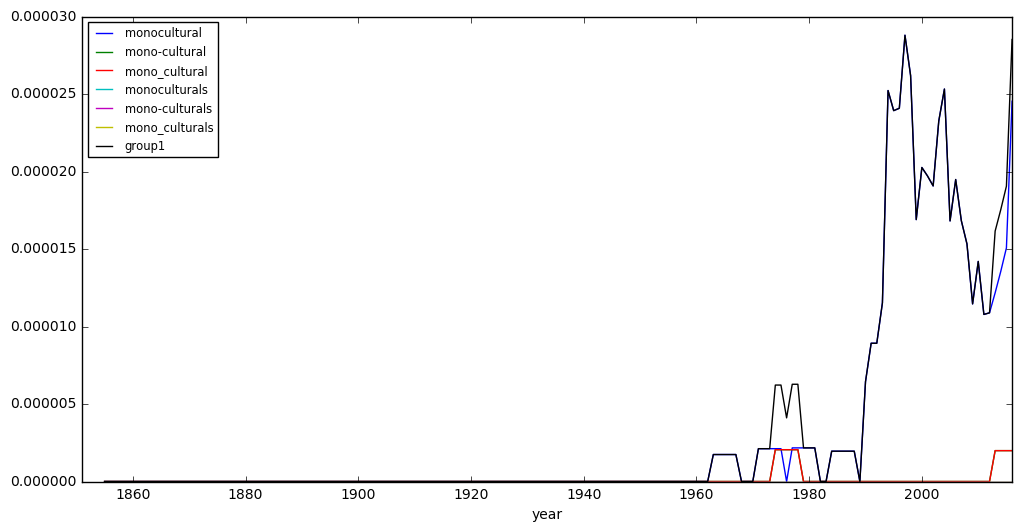

In [22]:
years_to_average_over = 5
smoothed_data = data.rolling(window=years_to_average_over).mean()
axis = smoothed_data.plot()
fig = plt.gcf()
fig.set_size_inches((12,6))
_ = axis.legend(prop=fontP, loc="best")